<a href="https://colab.research.google.com/github/Sharonayodele/convulotional_networks/blob/main/03_covolutional_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural networks and computer vision with Tensorflow

This us used for making predictions on image datasetand/or text data.

- Topics i'll be covering
Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example
- Steps in modelling for binary image - - classification with CNNs
- Creating a CNN model (starting with a baseline)
- Fitting a model (getting it to find patterns in our data)
- Evaluating a model
- Improving a model
- Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs


#Get the data
This section will be about Binary classification and i'll be using two categories of pizza and steak from the food 101 dataset

In [ ]:
import zipfile
#download the zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-29 17:45:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  66.1MB/s    in 1.6s    

2023-10-29 17:45:02 (66.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#Inspect the data
- the train directory
- the test directory

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
!ls pizza_steak/test/steak

100274.jpg   148595.jpg   2138503.jpg  2752603.jpg  3173402.jpg  3873655.jpg  66858.jpg
1012080.jpg  1498778.jpg  2144308.jpg  2756200.jpg  321090.jpg	 3901703.jpg  670345.jpg
1016217.jpg  1499273.jpg  219196.jpg   2772358.jpg  3235645.jpg  3903517.jpg  673127.jpg
1064847.jpg  1515274.jpg  2193535.jpg  277297.jpg   324862.jpg	 3905395.jpg  690177.jpg
1082384.jpg  1523026.jpg  2198931.jpg  2802460.jpg  3293212.jpg  391144.jpg   690477.jpg
108310.jpg   1627703.jpg  221604.jpg   2814314.jpg  3293650.jpg  39461.jpg    697562.jpg
1094883.jpg  1653815.jpg  2229090.jpg  281731.jpg   3297938.jpg  399377.jpg   7056.jpg
1107549.jpg  1655387.jpg  2246332.jpg  2821155.jpg  3315737.jpg  400530.jpg   717293.jpg
1118585.jpg  1662212.jpg  2276476.jpg  2824517.jpg  3343970.jpg  400951.jpg   721500.jpg
1163050.jpg  168551.jpg   2285106.jpg  2825105.jpg  3352834.jpg  401660.jpg   730464.jpg
1166047.jpg  1687010.jpg  228683.jpg   284097.jpg   3383942.jpg  40947.jpg    746921.jpg
1190808.jpg  1718949.jpg  

In [ ]:
import os
#view the directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
#another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
#get the class names (programmatically, for longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") #turns the training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Let's visualize the data to get a better understanding of it

In [ ]:
#plot a helper function to view random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
  #setup target directory ti view the iamges
  target_folder = target_dir + "/" + target_class

  #get a random image path
  random_images = random.sample(os.listdir(target_folder), 1)

  #read the images and plot
  img = mpimg.imread(target_folder + "/" + random_images[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #show image of the shape
  return img

Image shape: (512, 512, 3)


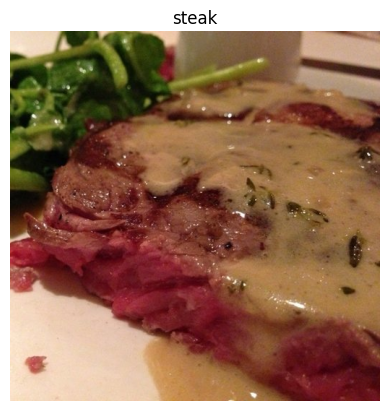

In [ ]:
#view a random image from training set
img = view_random_images(target_dir="pizza_steak/train/",
                         target_class="steak")

The computer sees images as numbers thats why we visualize

In [ ]:
img

array([[[242, 220, 196],
        [240, 218, 194],
        [241, 219, 195],
        ...,
        [162, 124, 111],
        [152, 115, 106],
        [143, 106,  97]],

       [[242, 220, 196],
        [241, 219, 195],
        [242, 220, 196],
        ...,
        [157, 119, 106],
        [150, 112, 101],
        [142, 106,  94]],

       [[244, 222, 198],
        [242, 220, 196],
        [242, 220, 196],
        ...,
        [156, 117, 102],
        [148, 109,  94],
        [139, 101,  88]],

       ...,

       [[251, 227, 203],
        [248, 224, 200],
        [247, 223, 197],
        ...,
        [108,  16,  27],
        [111,  20,  29],
        [114,  25,  31]],

       [[251, 229, 205],
        [250, 226, 202],
        [248, 224, 198],
        ...,
        [107,  14,  25],
        [108,  15,  25],
        [110,  19,  28]],

       [[250, 228, 204],
        [246, 224, 200],
        [247, 221, 196],
        ...,
        [106,  13,  24],
        [102,   9,  19],
        [102,   9,  19]]

In [ ]:
img.shape

(512, 512, 3)

(width, height, colors chanel)

In [ ]:
img.max()

255

the highest value of the array is 225 and that's because the possible range for rd, blue and green values are between 0 and 225

#Preprocessing the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#scaling the data by normalization
train_datagen = ImageDataGenerator(rescale=1./255) #multiply the data by the (1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup the data and test directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=32,# number of images to process at a time
                                                  target_size=(224, 224),# convert all images to be 224 x 224
                                                  class_mode='binary', #type of problem we're working on
                                                  seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#create a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)), #first layer should specift input_shape
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid') #output layer
])

#compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 159ms/step - loss: 0.7662 - accuracy: 0.6167 - val_loss: 0.4811 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4835 - accuracy: 0.7753 - val_loss: 0.4675 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4280 - accuracy: 0.8200 - val_loss: 0.3745 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3935 - accuracy: 0.8320 - val_loss: 0.3727 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3173 - accuracy: 0.8733 - val_loss: 0.3605 - val_accuracy: 0.8500


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 10)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 118810)            0         
                                                                 
 dense (Dense)               (None, 1)                 118811    
                                                        

Image shape: (512, 512, 3)
Image shape: (512, 382, 3)


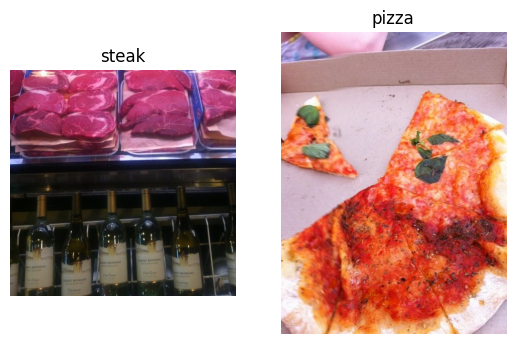

In [ ]:
#visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_images("pizza_steak/train/", 'steak')
#the figure has 1 row, 2 columns, and this plot is the first plot
#So, if we want a figure with 2 rows an 1 column (2,1,1)(meaning that
#the two plots will be displayed on top of each other instead of side-by-side)
plt.subplot(1, 2, 2)
pizza_img = view_random_images("pizza_steak/train/", 'pizza')

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
Let's discuss some of the components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
filters - these are the number of "feature extractors" that will be moving over our images.
kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [ ]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#create a function to plot the loss and accuracy metrics
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel('epochs')
  plt.legend()

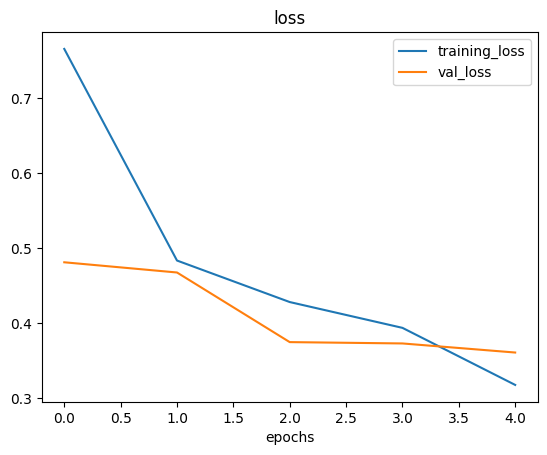

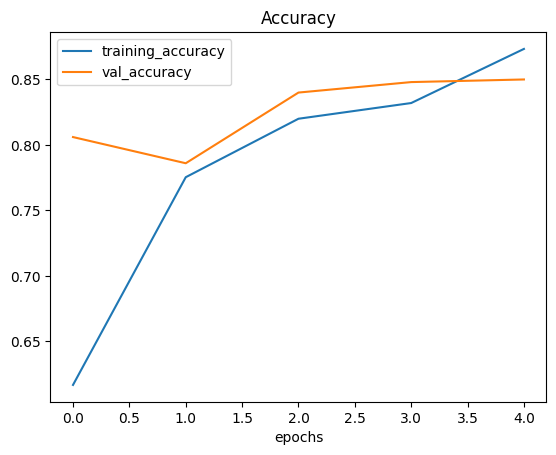

In [ ]:
plot_loss_curves(history_1)

Let's build two mkore models:
1. A convnet without max pooling layer
2. A convnet with max pooling layer and data audmentation

the typical CNN structure of:
CNN Explainer Webpage: https://poloclub.github.io/cnn-explainer/


Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

some of the components of the Conv2D layer:

- The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
- filters - these are the number of "feature extractors" that will be moving over our images.
- kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
- stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
- padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [ ]:
#make creating of our model easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
from warnings import filters
model_2 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)), #imput layer
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') #output layer (specify output shape)
])

In [ ]:
from keras.src.engine.training import optimizer
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 117ms/step - loss: 0.5969 - accuracy: 0.6913 - val_loss: 0.4576 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3841 - accuracy: 0.8427 - val_loss: 0.3331 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.2270 - accuracy: 0.9227 - val_loss: 0.3375 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.1277 - accuracy: 0.9660 - val_loss: 0.4392 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.0475 - accuracy: 0.9933 - val_loss: 0.4094 - val_accuracy: 0.8420


<Axes: >

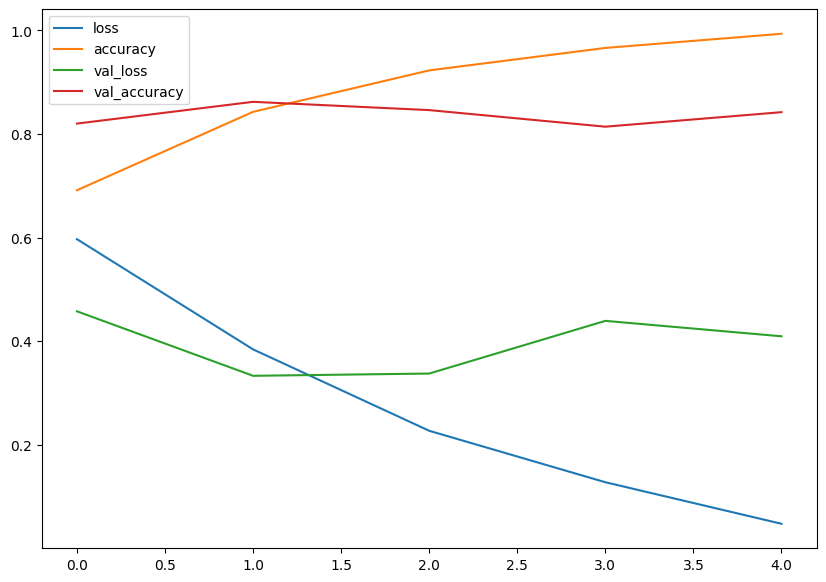

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Data Augmentation
is thwe process of altering our trainngdata leading it to have more diversity therby allowibg models to learn more generalized patterns.
E.g rotating, flipping or cropping the image to resemble real world data. This is done on the training set

In [ ]:
#Data Augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=10,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)

#create ImageDatagenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)
#non augmented data
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get data batch samples
images, labels= train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()  # Note: labels aren't augmented, they stay the same


In [ ]:
images[0].shape, labels[0].shape

((224, 224, 3), ())

(-0.5, 223.5, 223.5, -0.5)

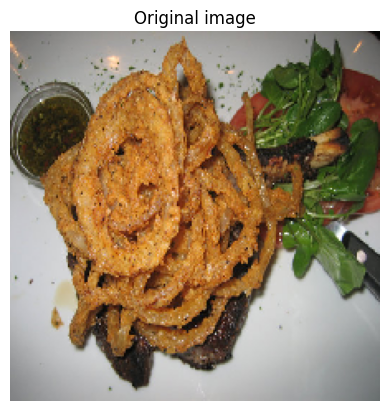

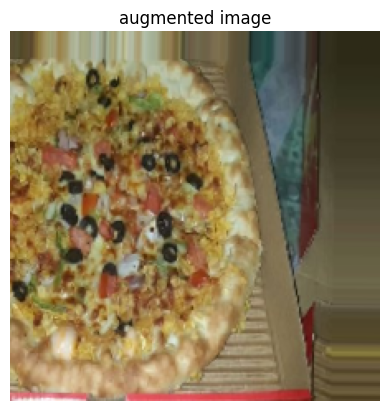

In [ ]:
#show orignal and augmented images
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('augmented image')
plt.axis(False)

Data augmentation is a way to try and prevent overfitting (i.e the validation loss keeps reducing) by forcing the model to learn from distorted images.

In [ ]:
#lets refit on the augmented data on the previous model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        )

Epoch 1/5
47/47 [==============================] - 22s 428ms/step - loss: 0.6577 - accuracy: 0.5880 - val_loss: 0.6262 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6110 - accuracy: 0.6700 - val_loss: 0.4912 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5220 - accuracy: 0.7527 - val_loss: 0.4244 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 24s 509ms/step - loss: 0.4966 - accuracy: 0.7647 - val_loss: 0.4233 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 23s 489ms/step - loss: 0.4743 - accuracy: 0.7833 - val_loss: 0.3412 - val_accuracy: 0.8660


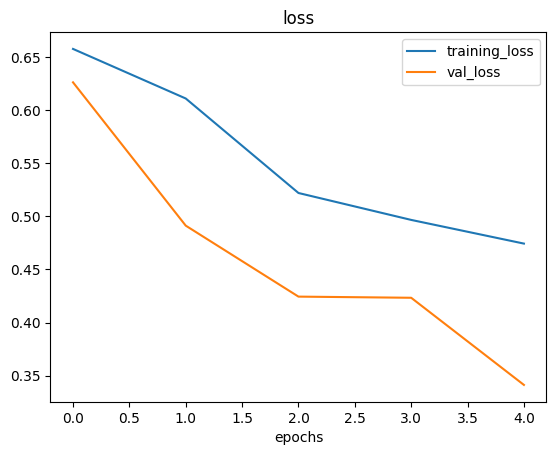

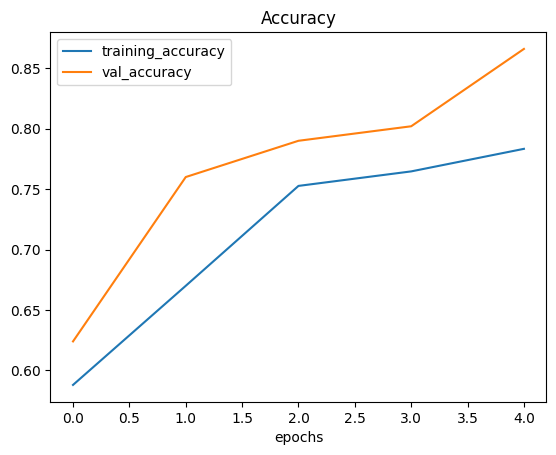

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 10)       

Now let's try to shuffle the uagmented data


In [ ]:
from tensorflow._api.v2.random import shuffle
train_data_augmented_shuff = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224,224),
                                                                         batch_size=32,
                                                                         class_mode='binary',
                                                                         shuffle=True)


Found 1500 images belonging to 2 classes.


In [ ]:
#same model as model_#

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_augmented_shuff,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuff),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 495ms/step - loss: 0.6382 - accuracy: 0.6353 - val_loss: 0.5259 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 23s 493ms/step - loss: 0.5516 - accuracy: 0.7240 - val_loss: 0.4177 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5393 - accuracy: 0.7527 - val_loss: 0.5242 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 21s 446ms/step - loss: 0.5176 - accuracy: 0.7540 - val_loss: 0.3947 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4901 - accuracy: 0.7713 - val_loss: 0.5084 - val_accuracy: 0.7440


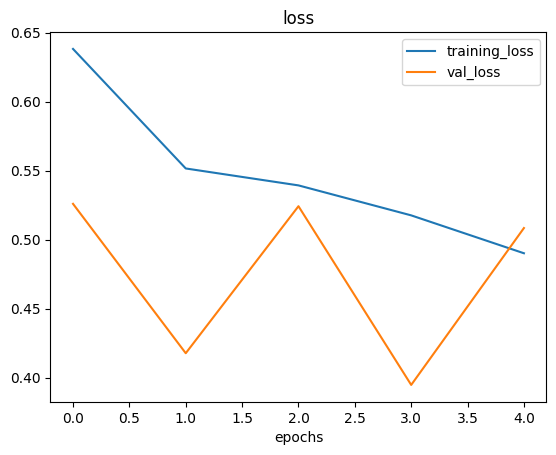

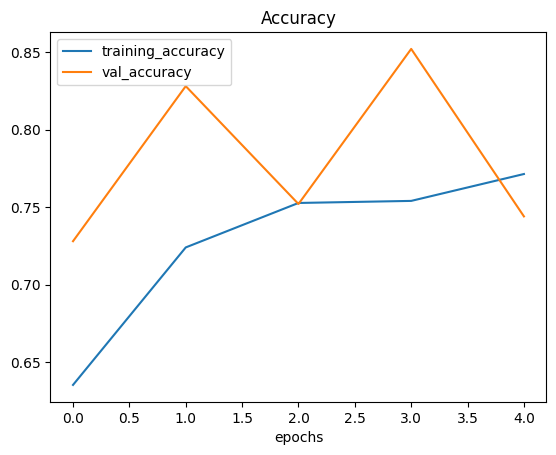

In [ ]:
plot_loss_curves(history_4)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

#Making Prediction
Let's predict using another image

--2023-10-29 17:52:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2023-10-29 17:52:01 (40.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



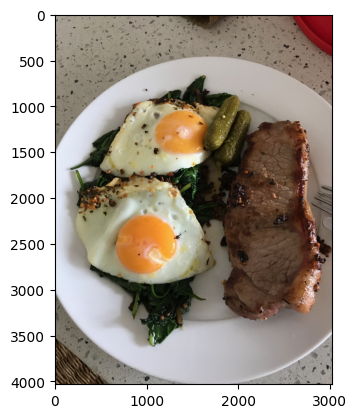

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak= mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
#plt.axis(false)

In [ ]:
steak.shape

(4032, 3024, 3)

To make prediction on custom data, it hsa to be in the same form that the model has been trained on

In [ ]:
#create a function to import an image  and resize it to be used in our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns into a tensor
  and reshapes to (img_shape, img_shape, color_channel).
  """
  #read file(images)
  img = tf.io.read_file(filename)

  #decode the read fi8le into a tenspr and ensure 3 color channels
  img = tf.image.decode_image(img, channels=3)

  #resize the image(>>>size our model was trained on)
  img = tf.image.resize(img, size=[img_shape, img_shape])

  #rescale the image
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak.shape

TensorShape([224, 224, 3])

In [ ]:
model_4.predict(steak)

ValueError: ignored

our model was trained in batches. so the batch size becomes the first dimension>>(32,224,3)
we can fix this by adding an extra dimension to our custom image>> tf.expand_dims

In [ ]:
#add an extra axis
print(f"shape bfor new dims: {steak.shape}")
steak = tf.expand_dims(steak, axis=0)
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"shape after new dims: {steak.shape}")
steak

shape bfor new dims: (224, 224, 3)
shape after new dims: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred = model_4.predict(steak)
pred

1/1 [==============================] - 0s 267ms/step


array([[0.9137127]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """import an image located at filename, maake a prediction on a model
  and plot an image with the prredicted class"""

  #import the target image preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 111ms/step


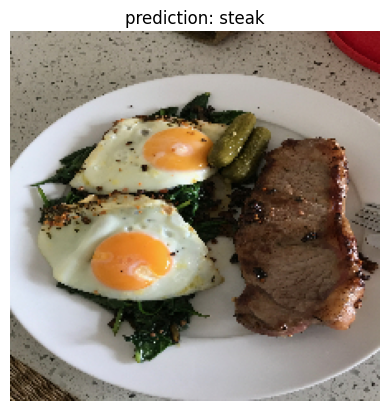

In [ ]:
#model on a custom image
pred_and_plot(model_4, '03-steak.jpeg', class_names)

--2023-10-29 17:52:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-10-29 17:52:43 (59.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 130ms/step


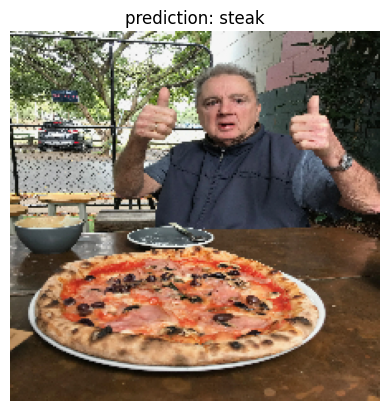

In [ ]:
#lets downlaod another image and try to predict
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_4, '03-pizza-dad.jpeg', class_names)

Let's move on to multi class classification


#Multi-class Classification

steps involved:
1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3.Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

#1. Import the data

In [ ]:
#the data is gotten from the food 101 dataset https://www.kaggle.com/datasets/dansbecker/food-101

import zipfile
#download the zipfile

!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#unzip
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-10-29 17:52:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  33.4MB/s    in 6.6s    

2023-10-29 17:52:51 (74.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now lets checl out the data downloaded

In [ ]:
import os
#walkn through and list files
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)}, directories and {len(filenames)} images in '{dirpath}'.")

There are 2, directories and 0 images in '10_food_classes_all_data'.
There are 10, directories and 0 images in '10_food_classes_all_data/train'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0, directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0, directories and 750 images in '10_food_classes_all_data/train

In [ ]:
train_dir_mtc = "10_food_classes_all_data/train/"
test_dir_mtc = "10_food_classes_all_data/test/"

In [ ]:
#get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir_mtc = pathlib.Path(train_dir_mtc)
class_names_mtc = np.array(sorted([item.name for item in data_dir_mtc.glob('*')]))
print(class_names_mtc)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Visualize an image: run this line multiple times to see the data we are woprking with

Image shape: (384, 512, 3)


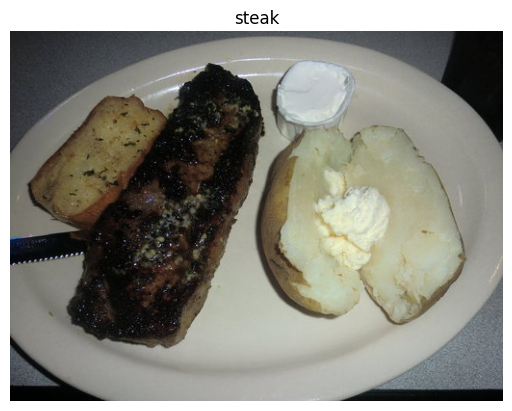

In [ ]:
import random
img_mtc = view_random_images(target_dir=train_dir_mtc,
                             target_class = random.choice(class_names_mtc))  # get a random class name

#2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale the data and create data generator indtances
train_datagen_mtc = ImageDataGenerator(rescale=1/255.)
test_datagen_mtc = ImageDataGenerator(rescale=1/255.)

#load data from directory and turn into batches
train_data_mtc = train_datagen.flow_from_directory(train_dir_mtc,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical')

test_data_mtc = test_datagen.flow_from_directory(test_dir_mtc,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#create model
model_5 = Sequential([
    Conv2D(10, 3,activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3 ,activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_5.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data_mtc,
                        epochs=5,
                        steps_per_epoch=len(train_data_mtc),
                        validation_data=test_data_mtc,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 122ms/step - loss: 2.1396 - accuracy: 0.2217 - val_loss: 1.9905 - val_accuracy: 0.2871
Epoch 2/5
235/235 [==============================] - 24s 100ms/step - loss: 1.8959 - accuracy: 0.3412 - val_loss: 1.8509 - val_accuracy: 0.3652
Epoch 3/5
235/235 [==============================] - 24s 101ms/step - loss: 1.6113 - accuracy: 0.4656 - val_loss: 1.8725 - val_accuracy: 0.3555
Epoch 4/5
235/235 [==============================] - 25s 108ms/step - loss: 1.0288 - accuracy: 0.6615 - val_loss: 2.3793 - val_accuracy: 0.2949
Epoch 5/5
235/235 [==============================] - 25s 108ms/step - loss: 0.4610 - accuracy: 0.8559 - val_loss: 3.3959 - val_accuracy: 0.2793


In [ ]:
model_5.evaluate(test_data_mtc)

79/79 [==============================] - 8s 102ms/step - loss: 3.1824 - accuracy: 0.2912


[3.1823856830596924, 0.29120001196861267]

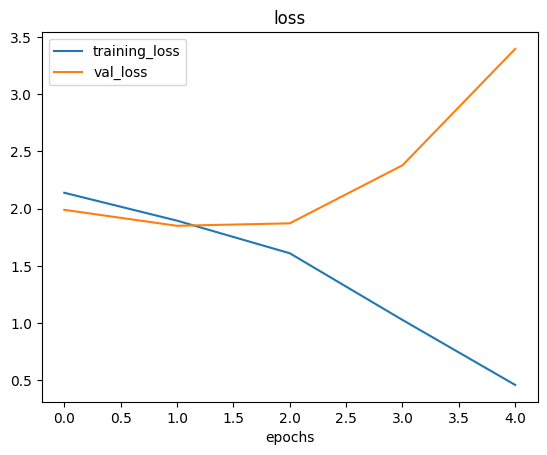

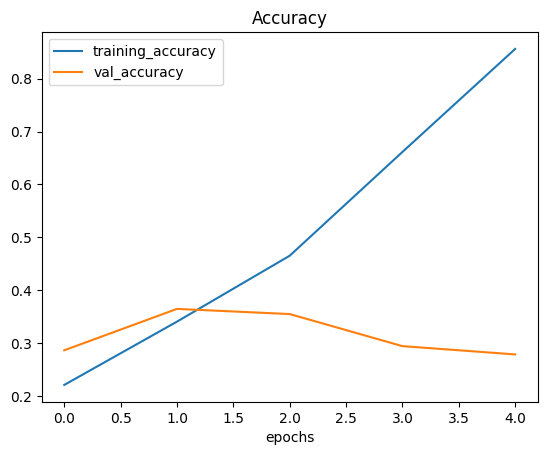

In [ ]:
plot_loss_curves(history_5)

let's try a simplified model

In [ ]:
model_6 = Sequential([
    Conv2D(10, 3,activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_6.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_mtc,
                        epochs=5,
                        steps_per_epoch=len(train_data_mtc),
                        validation_data=(test_data_mtc),
                        validation_steps=len(test_data_mtc))

Epoch 1/5
235/235 [==============================] - 33s 134ms/step - loss: 2.0978 - accuracy: 0.2492 - val_loss: 1.9251 - val_accuracy: 0.3160
Epoch 2/5
235/235 [==============================] - 30s 127ms/step - loss: 1.7577 - accuracy: 0.4044 - val_loss: 1.8204 - val_accuracy: 0.3720
Epoch 3/5
235/235 [==============================] - 33s 142ms/step - loss: 1.4314 - accuracy: 0.5333 - val_loss: 1.8152 - val_accuracy: 0.3788
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 1.0025 - accuracy: 0.6855 - val_loss: 2.0349 - val_accuracy: 0.3508
Epoch 5/5
235/235 [==============================] - 34s 143ms/step - loss: 0.5934 - accuracy: 0.8293 - val_loss: 2.2011 - val_accuracy: 0.3476


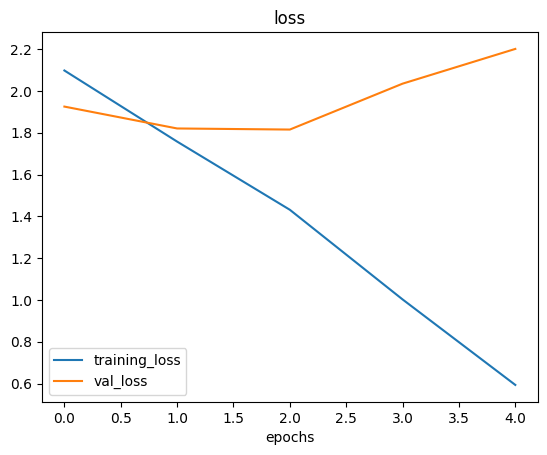

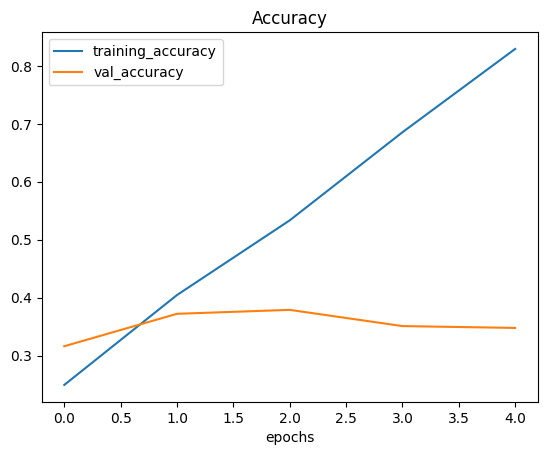

In [ ]:
plot_loss_curves(history_6)

#Data augmentation of a multiclass CNN

In [ ]:
train_datagenmtc_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented_mtc = train_datagenmtc_augmented.flow_from_directory(train_dir_mtc,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


Rather than rewrite the model from scratch, we can clone the model using>>>clone_model

In [ ]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_7 = model_7.fit(train_data_augmented_mtc,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_mtc),
                        validation_data=test_data_mtc,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 463ms/step - loss: 2.2225 - accuracy: 0.2069 - val_loss: 1.9479 - val_accuracy: 0.3184
Epoch 2/5
235/235 [==============================] - 101s 431ms/step - loss: 2.0344 - accuracy: 0.2868 - val_loss: 1.9284 - val_accuracy: 0.3223
Epoch 3/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9923 - accuracy: 0.3000 - val_loss: 1.8618 - val_accuracy: 0.3398
Epoch 4/5
235/235 [==============================] - 107s 454ms/step - loss: 1.9547 - accuracy: 0.3227 - val_loss: 1.8196 - val_accuracy: 0.3691
Epoch 5/5
235/235 [==============================] - 99s 421ms/step - loss: 1.9337 - accuracy: 0.3268 - val_loss: 1.7288 - val_accuracy: 0.4043


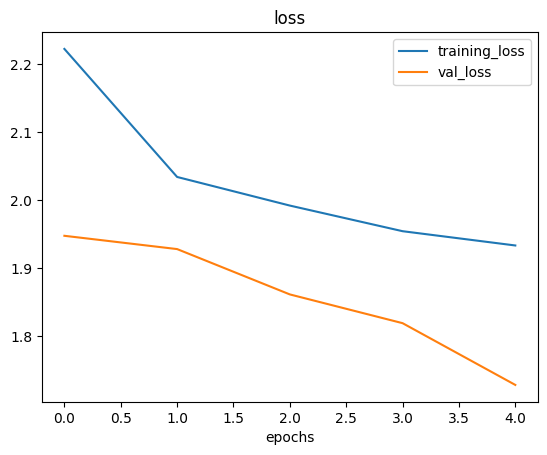

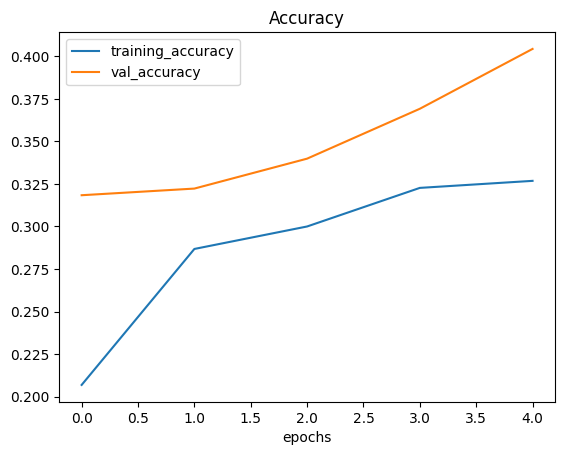

In [ ]:
plot_loss_curves(history_7)

In [ ]:
class_names_mtc

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [ ]:
pred_mtc = model_7.predict(tf.expand_dims(img, axis=0))
pred

ValueError: ignored

let's rework ourpred_and_plot model to work for multiclass data

In [ ]:
def pred_and_plot_mtc(model, filename, class_names):
  """import image in filename, make prediction on it with trained model and plot the
  image with the predicted class as the title
  """
  #import the target image and preprocess it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1: #check the no of values in the pred array
    pred_class = class_names[pred.argmax()] #if more than 1 output take the max
  else:
    pred_class = class_names[int(tf.round(pred))]# if only one output, round

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 81ms/step


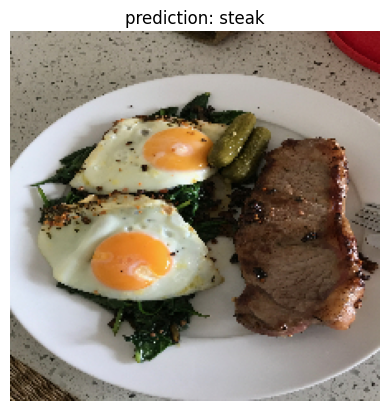

In [ ]:
pred_and_plot_mtc(model_7, "03-steak.jpeg", class_names_mtc)

1/1 [==============================] - 0s 26ms/step


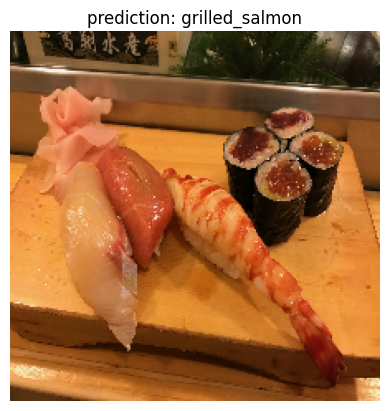

In [ ]:
pred_and_plot_mtc(model_7, "03-sushi.jpeg", class_names_mtc)

1/1 [==============================] - 0s 80ms/step


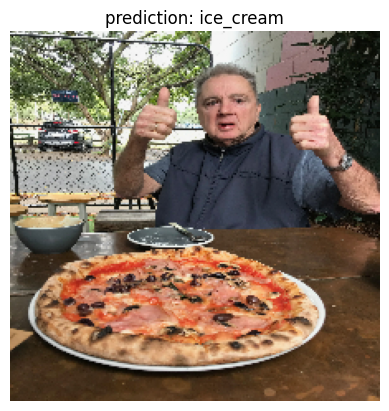

In [ ]:
pred_and_plot_mtc(model_7, "03-pizza-dad.jpeg", class_names_mtc)


1/1 [==============================] - 0s 29ms/step


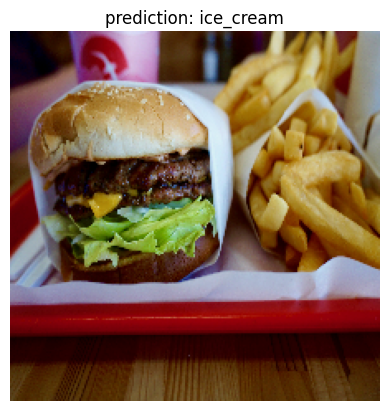

In [ ]:
pred_and_plot_mtc(model_7, "03-hamburger.jpeg", class_names_mtc)

Saving and loading our model

In [ ]:
model_7.save("saved_augmented_model")

In [ ]:
load_model_7 = tf.keras.models.load_model("saved_augmented_model")
load_model_7.evaluate(test_data_mtc)

79/79 [==============================] - 8s 97ms/step - loss: 1.7467 - accuracy: 0.3992


[1.7466951608657837, 0.3991999924182892]

In [ ]:
model_7.evaluate(test_data_mtc)

79/79 [==============================] - 7s 94ms/step - loss: 1.7467 - accuracy: 0.3992


[1.7466946840286255, 0.3991999924182892]

So the model was properly saved and loaded